# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /home/boy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/boy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [5]:
DECADE = '1910'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [6]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [7]:
# Exemple de fichiers
files[:5]

['KB_JB838_1910-01-06_01-00008.txt',
 'KB_JB838_1910-01-07_01-00003.txt',
 'KB_JB838_1910-01-09_01-00010.txt',
 'KB_JB838_1910-01-13_01-00007.txt',
 'KB_JB838_1910-01-16_01-00009.txt']

In [8]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [9]:
# Exemple de textes
texts[0][:400]

'V ’ \' ,^ïl\\* I KTTWrMlftfTi¥riM»irniiÉiin*ii> i ri rr r r iuvur n>miriiirianiiiinnnw n irirm mriToi i -- — ~ - . #* * ■ * i* ■ ■■ • »■ ma nr WT e EXTRACTION COMPLETEMENT SANS DOULEUR g e H’&H*"Ge»s** SOUWEINE 155, fie Utft la. \'- A1 « «i> ■■ 8 r - _ \'\' na, T\' DEI9TS DEP. 5 FS. maison do oonfiahtà, INSTITUT DENTAIRE DU80HEH, G2, rue de Louynln . Surpassa tout co que roua avez pu voir en Belgique, v'

## Vectoriser les documents à l'aide de TF-IDF

In [10]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [11]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [12]:
tfidf_vectors = vectorizer.fit_transform(texts)

/home/boy/Documents/M-STIC/Traitement Automatique de Corpus/tac/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
# Détail de la matrice
tfidf_vectors

<700x4042 sparse matrix of type '<class 'numpy.float64'>'
	with 576850 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [14]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

ft             0.498859
vend           0.303463
piano          0.210893
pianos         0.185838
occas          0.125603
                 ...   
efforts        0.000000
eglise         0.000000
ei             0.000000
electricité    0.000000
♦              0.000000
Length: 4042, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [15]:
cosine([1, 2, 3], [1, 2, 3])

0

In [18]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [19]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [16]:
tfidf_array = tfidf_vectors.toarray()

In [17]:
# Vecteur du document 0
tfidf_array[0]

array([0.01446701, 0.        , 0.        , ..., 0.04123556, 0.        ,
       0.        ])

In [18]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.        , 0.        , ..., 0.01786446, 0.06976965,
       0.        ])

In [19]:
cosine(tfidf_array[0], tfidf_array[1])

0.9465984121110094

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [20]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [21]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [22]:
clusters = km_model.fit_predict(tfidf_vectors)

In [23]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [24]:
pprint(dict(clustering))

{0: ['KB_JB838_1910-01-07_01-00003.txt',
     'KB_JB838_1910-01-17_01-00002.txt',
     'KB_JB838_1910-01-22_01-00003.txt',
     'KB_JB838_1910-01-22_01-00004.txt',
     'KB_JB838_1910-01-29_01-00003.txt',
     'KB_JB838_1910-01-30_01-00003.txt',
     'KB_JB838_1910-02-07_01-00002.txt',
     'KB_JB838_1910-02-09_01-00002.txt',
     'KB_JB838_1910-02-09_01-00004.txt',
     'KB_JB838_1910-02-18_01-00001.txt',
     'KB_JB838_1910-02-24_01-00003.txt',
     'KB_JB838_1910-02-25_01-00002.txt',
     'KB_JB838_1910-03-05_01-00008.txt',
     'KB_JB838_1910-03-06_01-00005.txt',
     'KB_JB838_1910-03-16_02-00001.txt',
     'KB_JB838_1910-03-19_01-00003.txt',
     'KB_JB838_1910-03-28_01-00004.txt',
     'KB_JB838_1910-04-02_01-00004.txt',
     'KB_JB838_1910-04-10_01-00001.txt',
     'KB_JB838_1910-04-12_01-00003.txt',
     'KB_JB838_1910-04-17_01-00002.txt',
     'KB_JB838_1910-04-29_01-00003.txt',
     'KB_JB838_1910-04-29_01-00004.txt',
     'KB_JB838_1910-04-30_01-00002.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [25]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [26]:
reduced_vectors[:10]

array([[ 0.10868873, -0.53281298],
       [-0.33264547,  0.12563927],
       [ 0.22466641, -0.33757388],
       [ 0.59928262,  0.30194218],
       [ 0.41641512, -0.0036384 ],
       [-0.29016048,  0.10669739],
       [-0.25422701,  0.03886942],
       [-0.14122682, -0.1207367 ],
       [-0.28880104,  0.07467399],
       [-0.2677993 ,  0.05373394]])

In [ ]:
import matplotlib
import IPython
import matplotlib_inline

print("matplotlib =", matplotlib.__version__)
print("IPython =", IPython.__version__)
print("matplotlib-inline =", matplotlib_inline.__version__)


### Générer le plot

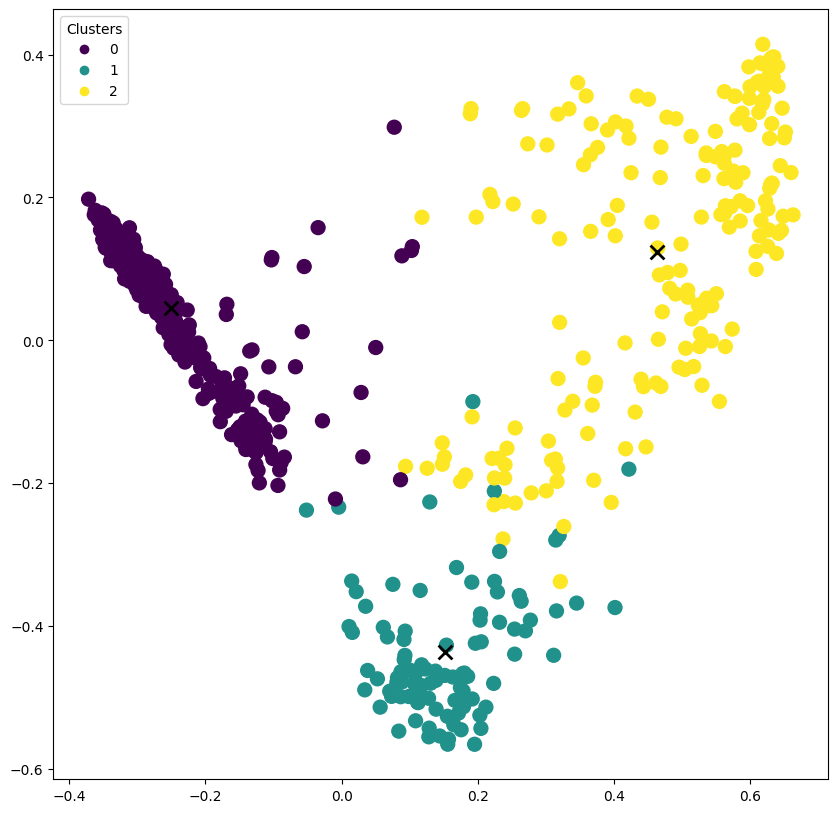

In [43]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")